Streaming output truncated to the last 5000 lines.
b =  2.9000000000000004  I =  3.318  grid =  18.0
b =  2.906  I =  3.318  grid =  17.0
b =  2.912  I =  3.318  grid =  17.0
b =  2.918  I =  3.318  grid =  17.0
b =  2.9240000000000004  I =  3.318  grid =  17.0
b =  2.93  I =  3.318  grid =  16.0
b =  2.936  I =  3.318  grid =  16.0
b =  2.942  I =  3.318  grid =  16.0
b =  2.948  I =  3.318  grid =  16.0
b =  2.954  I =  3.318  grid =  17.0
b =  2.96  I =  3.318  grid =  15.0
b =  2.966  I =  3.318  grid =  15.0
b =  2.972  I =  3.318  grid =  15.0
b =  2.978  I =  3.318  grid =  15.0
b =  2.984  I =  3.318  grid =  16.0
b =  2.99  I =  3.318  grid =  15.0
b =  2.996  I =  3.318  grid =  16.0
b =  3.0020000000000002  I =  3.318  grid =  16.0
b =  3.008  I =  3.318  grid =  16.0
b =  3.0140000000000002  I =  3.318  grid =  16.0
b =  3.02  I =  3.318  grid =  16.0
b =  3.0260000000000002  I =  3.318  grid =  16.0
b =  3.032  I =  3.318  grid =  16.0
b =  3.0380000000000003  I =  3.318  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:112: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


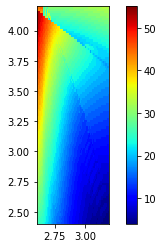

In [1]:
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
sp.init_printing()
a = 1
c = 1
d = 5
x_rest = -1.6
# b = 3.214
r = 0.0021
s = 4
# I = 3.823
def HR3(t, X, b, I):
    x, y, z = X
    return [y - a*x**3 + b*x**2 + I - z, c - d*x**2 - y, r*(s*(x - x_rest) - z)]
surface = lambda x, y, z, b, I: y - x**3 + b*x**2 + I - z

def evt(t, X, b, I):
    x, y, z = X
    return surface(x, y, z, b, I)

evt.terminal = False
evt.direction = 1

def crossing(b, I):
    crosscounter = 0
    t_start = 0
    t_finish = 500
    x_start = 0
    y_start = -4
    z_start = 4
    
    sol = solve_ivp(HR3, [t_start, t_finish], [x_start, y_start, z_start], rtol = 1e-11, atol = 1e-11,  events = evt, dense_output=True, args = (b, I))
    ts = sol.t
    xs, ys, zs = sol.y
    
        
    dots = sol.y_events
    
    pos_evts = [sol.sol(t) for t in sol.t_events]
    ps_x, ps_y, ps_z = zip(*pos_evts)
    ps_x = ps_x[0]
    ps_y = ps_y[0]
    ps_z = ps_z[0]

#####
    
    counter = 0
    
#     print(ps_z)
    
    for i in range(len(ps_z)-1):
        for j in range(len(ps_z) - 1):
#             print('ps_z[', i,'] = ', ps_z[i], ' ps_z[', j, '] = ', ps_z[j])
            if ps_z[i] == ps_z[j]:
                counter = counter + 1
    
    crosscounter = counter
    
#####
    
#      crosscounter = len(ps_z)
    
#     print('ps_x = ', ps_x)
    
#     print('ps_z = ', ps_z)
    
#     print(len(ps_x))

#     print(dots)
    
#     print(type(dots))
    
#     print(len(dots))
    
#     print(xs[-1], ys[-1], zs[-1])
    
#     print(surface(xs[-1], ys[-1], zs[-1], b, I))
        
#         if ts[-1] != t_finish:
#             crosscounter = crosscounter + 1
#             t_start = ts[-1]
#             x_start = xs[-1]
#             y_start = ys[-1]
#             z_start = zs[-1]
#             print('b = ', b, ' I = ', I, ' cc = ', crosscounter)
#             print('coords = ',t_start, x_start, y_start, z_start)
#             print('surface = ', surface(x_start, y_start, z_start, b, I))
#         else:
#             t_start = ts[-1]
#         for j in range(len(ts)):
#             if surface(xs[j-1], ys[j-1], zs[j-1], b, I)*surface(xs[j], ys[j], zs[j], b, I) < 0:
#                 crosscounter = crosscounter + 1

    return crosscounter

# test = crossing(3, 3.295)
# print(test)

bs = np.linspace(2.6, 3.2, 101)
Is = np.linspace(2.4, 4.2, 101)
grid = np.zeros([len(Is), len(bs)])
print('bs =', len(bs))
print('Is =', len(Is))
for i, I in enumerate(Is):
    for j, b in enumerate(bs):
        grid[i][j] = crossing(b, I)
        print('b = ', b, ' I = ', I, ' grid = ', grid[i][j])
plt.pcolormesh(bs, Is, grid, cmap=plt.cm.get_cmap('jet'))
plt.axes().set_aspect('equal', adjustable='box')
plt.colorbar()